In [10]:
# Load the necessary libraries
library(readr)
library(dplyr)
# Load your dataset (replace the path with your actual file location)
data <- read_csv("data.csv")

# View the first few rows of the dataset
head(data)
# Check the structure of the dataset
#str(data)

# View summary statistics
#summary(data)
#nrow(data)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Rows: 29 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (13): What was your last semester's grade point average?, Are you curren...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


What was your last semester's grade point average?,Are you currently working part-time?,How many hours do you work each week?,What is your main reason for part-time work?,How is your working environment?,Is your employer supportive of your academic schedules?,Do you feel exhausted both physically or mentally after work?,Can you adjust your schedules during exam time?,How many hours a week do you study outside of class?,When is the best time for you to study?,Do you think your work has an impact on your grades?,How do you balance your time between work and study?,Do you struggle to balance your job and studies?
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
71-80%,Yes,11-20,Financial need,Neutral,Sometimes,Sometimes,Yes,5-10 hours,Night,Yes,Studies first,Occasionally
50-60%,Yes,21-30,Financial Independence,Streeful,Sometimes,Rarely,Yes,5-10 hours,Night,Maybe,Balance both equally,"Yes, always"
Below 50%,Yes,11-20,Financial need,Neutral,Yes,Sometimes,No,Below 5 hours,Night,Yes,Balance both equally,"Yes, always"
50-60%,Yes,21-30,Financial need,Comfortable,Yes,Sometimes,Yes,Below 5 hours,Night,Yes,Balance both equally,"Yes, always"
71-80%,Yes,21-30,Financial Independence,Neutral,Yes,Sometimes,Yes,Below 5 hours,Evening,Yes,Balance both equally,"Yes, always"
50-60%,Yes,21-30,Financial need,Neutral,Yes,Sometimes,Yes,5-10 hours,Night,Maybe,Balance both equally,Occasionally


In [14]:
# Map grade percentage ranges to numeric values
data$Grade_Percentage <- recode(data$`What was your last semester's grade point average?`,
                                "Below 50%" = 45, "50-60%" = 55, "71-80%" = 75.5, "Above 80%" = 85)

# Map weekly work hours ranges to numeric values
data$Weekly_Work_Hours <- recode(data$`How many hours do you work each week?`,
                                 "1-10" = 5, "11-20" = 15.5, "21-30" = 25.5, "Over 30" = 35)

# Map study hours ranges to numeric values
data$Study_Hours <- recode(data$`How many hours a week do you study outside of class?`,
                           "Below 5 hours" = 2.5, "5-10 hours" = 7.5, "11-20 hours" = 15.5, "Above 20 hours" = 25)

# Convert work environment to a factor
data$Work_Environment <- as.factor(data$`How is your working environment?`)


In [15]:
# Select relevant columns
data_clean <- data %>%
  select(Grade_Percentage, Weekly_Work_Hours, Work_Environment, Study_Hours) %>%
  na.omit()

# View cleaned data
head(data_clean)
nrow(data_clean)

Grade_Percentage,Weekly_Work_Hours,Work_Environment,Study_Hours
<dbl>,<dbl>,<fct>,<dbl>
75.5,15.5,Neutral,7.5
55.0,25.5,Streeful,7.5
45.0,15.5,Neutral,2.5
55.0,25.5,Comfortable,2.5
75.5,25.5,Neutral,2.5
55.0,25.5,Neutral,7.5


[1] 29

In [16]:
# Fit the multiple linear regression model
model <- lm(Grade_Percentage ~ Weekly_Work_Hours + Work_Environment + Study_Hours, data = data_clean)

# View the summary of the model
summary(model)



Call:
lm(formula = Grade_Percentage ~ Weekly_Work_Hours + Work_Environment + 
    Study_Hours, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.532 -11.838   1.564   8.662  20.468 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               65.5533    11.1344   5.887  4.5e-06 ***
Weekly_Work_Hours         -0.2972     0.4009  -0.741    0.466    
Work_EnvironmentNeutral   -2.3051     5.5764  -0.413    0.683    
Work_EnvironmentStreeful   9.4543     7.8616   1.203    0.241    
Study_Hours                0.7854     0.5219   1.505    0.145    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.81 on 24 degrees of freedom
Multiple R-squared:  0.1815,	Adjusted R-squared:  0.04507 
F-statistic:  1.33 on 4 and 24 DF,  p-value: 0.2874


In [17]:

vif(model)


ERROR: Error in vif(model): could not find function "vif"


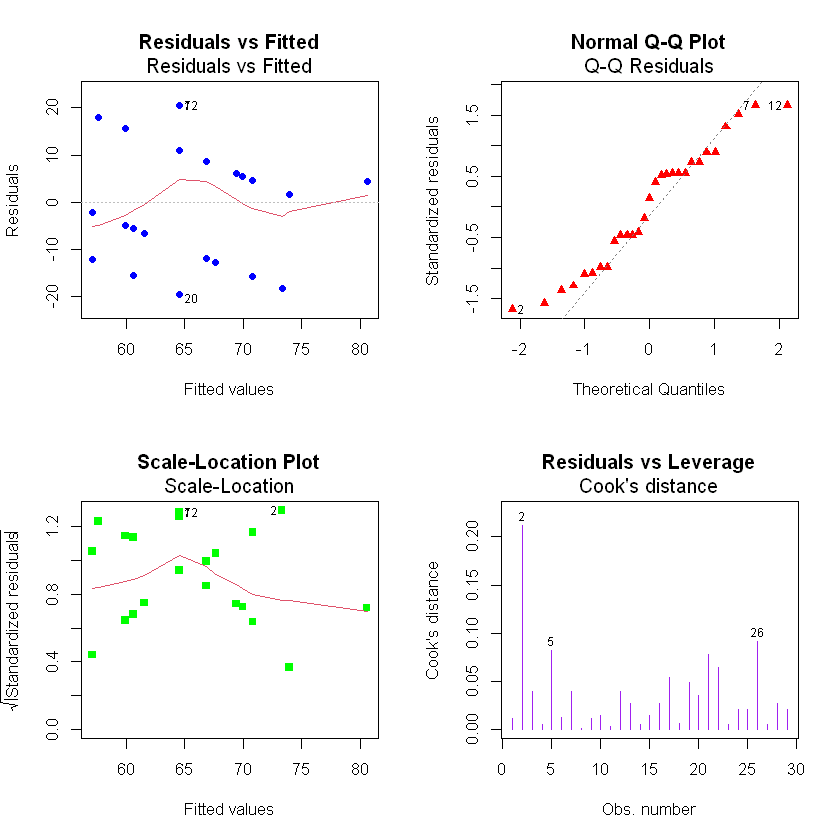

In [18]:
# Example of diagnostic plots with colors
par(mfrow = c(2, 2))

# Residuals vs Fitted plot with colored points
plot(model, which = 1, col = "blue", pch = 19, main = "Residuals vs Fitted")

# Q-Q plot with colored points
plot(model, which = 2, col = "red", pch = 17, main = "Normal Q-Q Plot")

# Scale-Location plot with colored points
plot(model, which = 3, col = "green", pch = 15, main = "Scale-Location Plot")

# Residuals vs Leverage plot with colored points
plot(model, which = 4, col = "purple", pch = 18, main = "Residuals vs Leverage")



In [7]:
# Additional analysis: correlation matrix
numeric_vars <- data[c("Grade_Percentage", "Weekly_Work_Hours", "Study_Hours")]
cor_matrix <- cor(numeric_vars, use = "complete.obs")
print("\nCorrelation Matrix:")
print(cor_matrix)

[1] "\nCorrelation Matrix:"
                  Grade_Percentage Weekly_Work_Hours Study_Hours
Grade_Percentage         1.0000000        -0.1871366   0.3267089
Weekly_Work_Hours       -0.1871366         1.0000000  -0.4624778
Study_Hours              0.3267089        -0.4624778   1.0000000


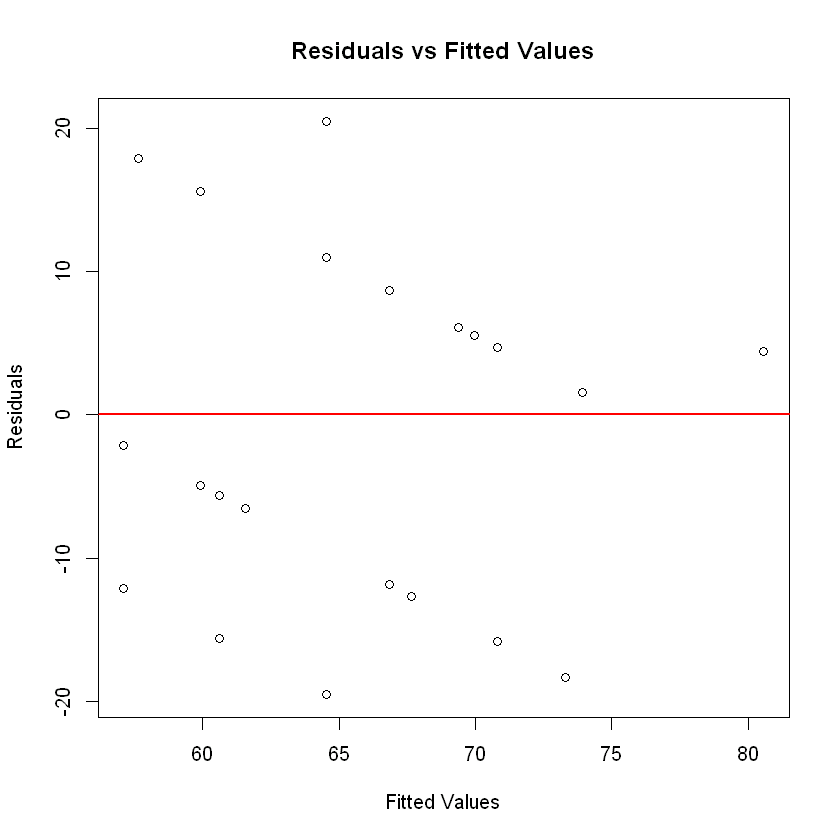

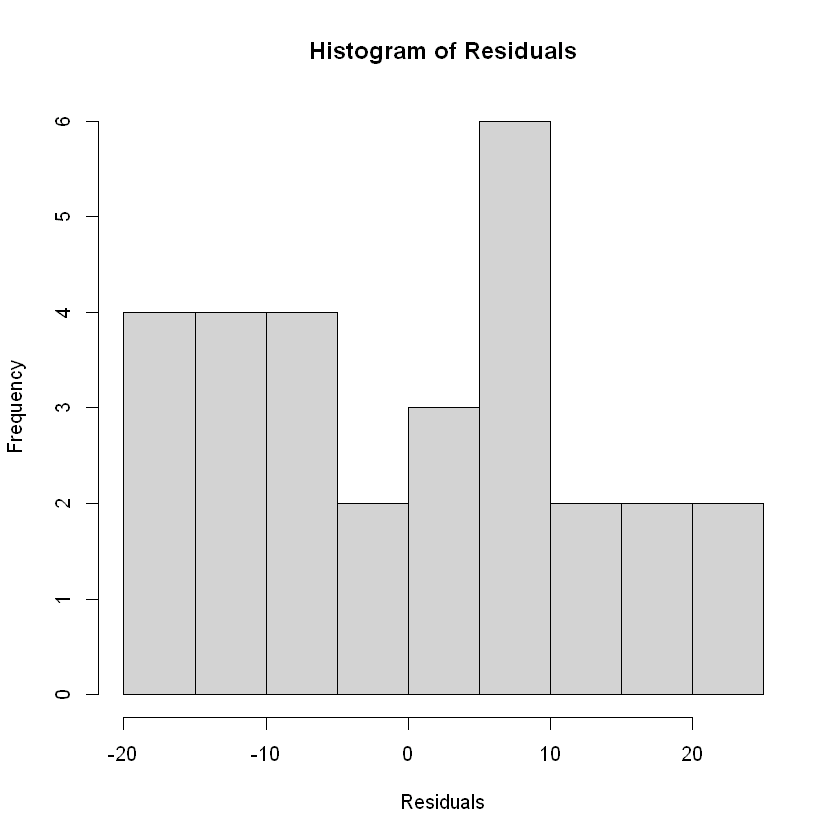

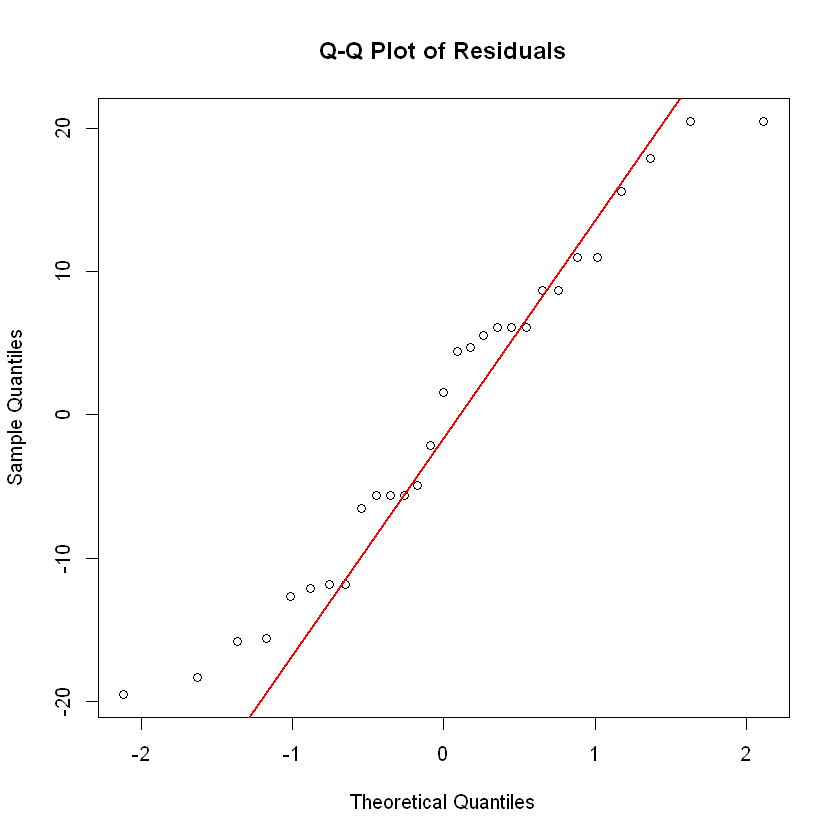

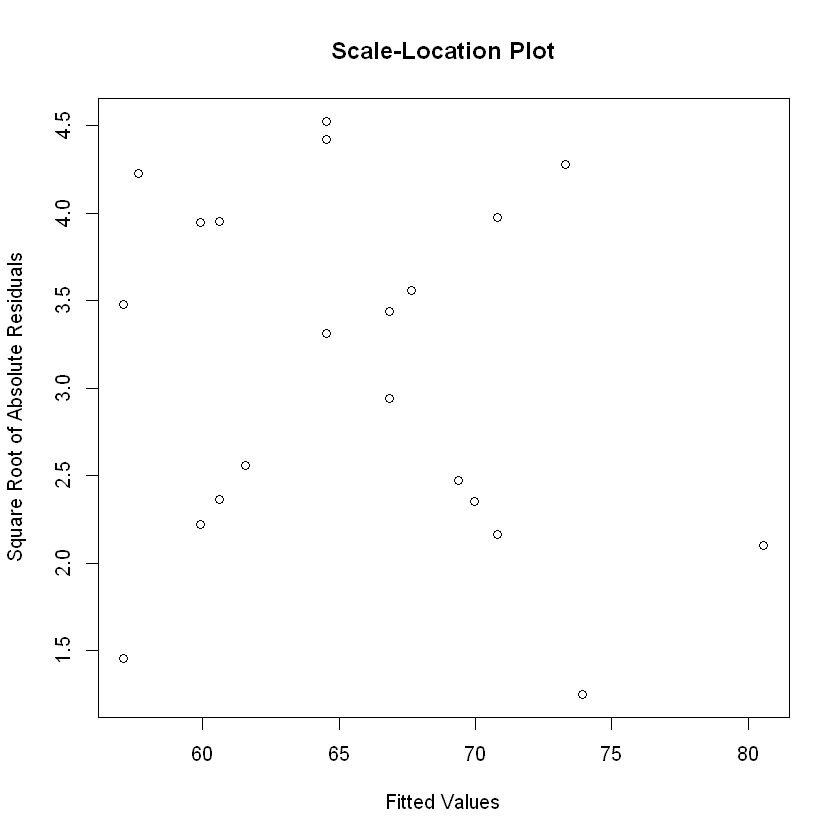

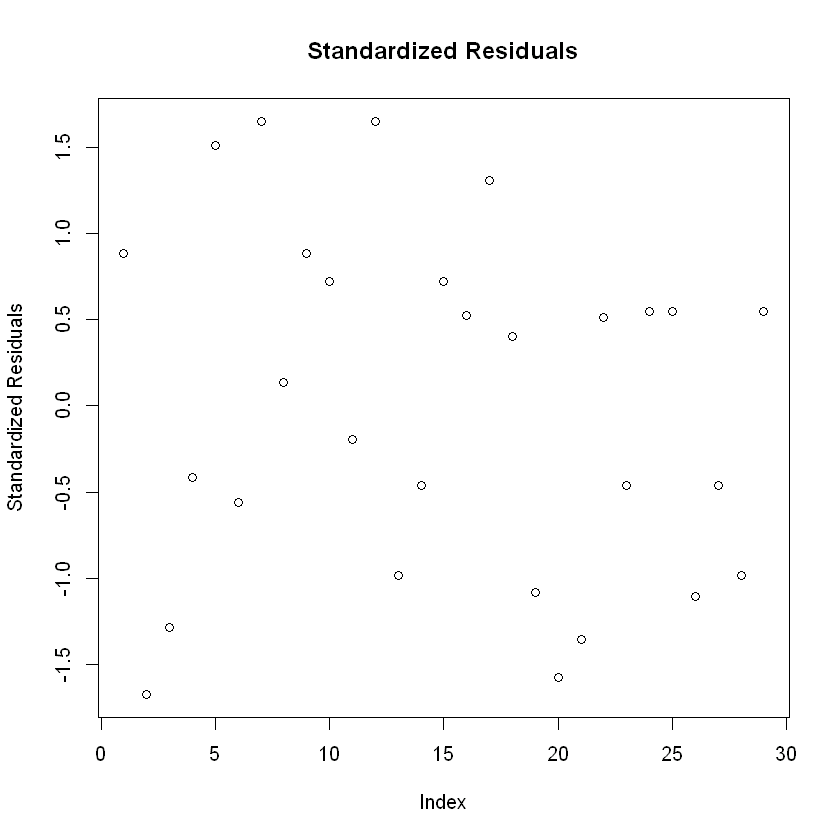

In [19]:
# Extract residuals and fitted values
residuals <- resid(model)
fitted_values <- fitted(model)

# 1. Residuals vs. Fitted Values Plot
plot(fitted_values, residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red", lwd = 2)

# 2. Normality of Residuals: Histogram
hist(residuals, breaks = 10, main = "Histogram of Residuals", xlab = "Residuals")

# 3. Normality of Residuals: Q-Q Plot
qqnorm(residuals, main = "Q-Q Plot of Residuals")
qqline(residuals, col = "red", lwd = 2)

# 4. Homoscedasticity: Scale-Location Plot
plot(fitted_values, sqrt(abs(residuals)),
     xlab = "Fitted Values",
     ylab = "Square Root of Absolute Residuals",
     main = "Scale-Location Plot")
abline(h = 0, col = "red", lwd = 2)

# 5. Outliers: Standardized Residuals
std_res <- rstandard(model)
plot(std_res, ylab = "Standardized Residuals", xlab = "Index",
     main = "Standardized Residuals")
abline(h = c(-2, 2), col = "red", lty = 2)


In [9]:
# New data for prediction
new_data <- data.frame(
  Weekly_Work_Hours = c(10, 20),
  Work_Environment = factor(c("Neutral", "Comfortable"), levels = levels(data_clean$Work_Environment)),
  Study_Hours = c(15, 25)
)

# Predict grades
predictions <- predict(model, newdata = new_data)
print(predictions)


       1        2 
72.05747 79.24482 


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



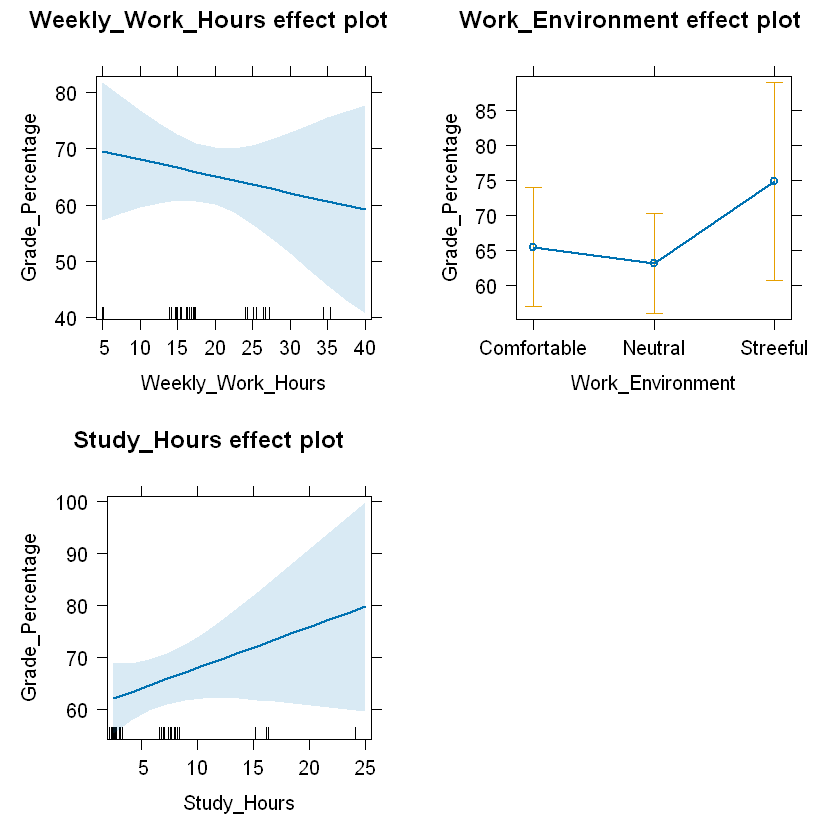

In [8]:
library(effects)
plot(allEffects(model))

In [2]:
# Extract residuals and fitted values
residuals <- resid(model)
fitted_values <- fitted(model)

# 1. Residuals vs. Fitted Values Plot
plot(fitted_values, residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red", lwd = 2)

# 2. Normality of Residuals: Histogram
hist(residuals, breaks = 10, main = "Histogram of Residuals", xlab = "Residuals")

# 3. Normality of Residuals: Q-Q Plot
qqnorm(residuals, main = "Q-Q Plot of Residuals")
qqline(residuals, col = "red", lwd = 2)

# 4. Homoscedasticity: Scale-Location Plot
plot(fitted_values, sqrt(abs(residuals)),
     xlab = "Fitted Values",
     ylab = "Square Root of Absolute Residuals",
     main = "Scale-Location Plot")
abline(h = 0, col = "red", lwd = 2)

# 5. Outliers: Standardized Residuals
std_res <- rstandard(model)
plot(std_res, ylab = "Standardized Residuals", xlab = "Index",
     main = "Standardized Residuals")
abline(h = c(-2, 2), col = "red", lty = 2)


ERROR: Error: object 'model' not found
